Choose between Current Density or Weight Percentage:
Current Density
Enter the name of the file: 
'1 C'_1
Enter the Current Density: 
1
Do you want to upload more files? 
1
Enter the name of the file: 
'2 C'_1
Enter the Current Density: 
2
Do you want to upload more files? 
1
Enter the name of the file: 
'3 C'_1
Enter the Current Density: 
3
Do you want to upload more files? 
1
Enter the name of the file: 
'5 C'_1
Enter the Current Density: 
5
Do you want to upload more files? 
1
Enter the name of the file: 
'10 C'_1
Enter the Current Density: 
10
Do you want to upload more files? 
0
Name of the Output File: 
out
Enter the Value of Potential Window:
0.5


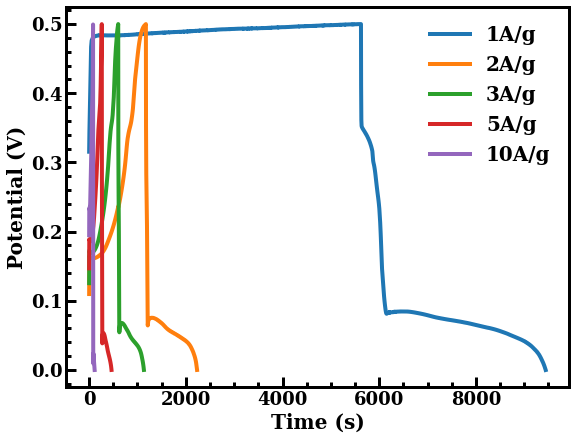

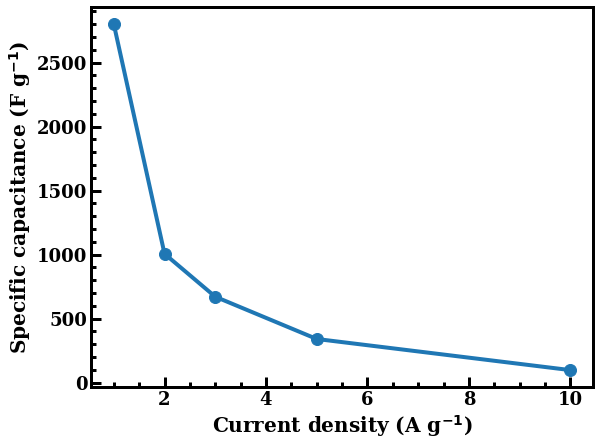

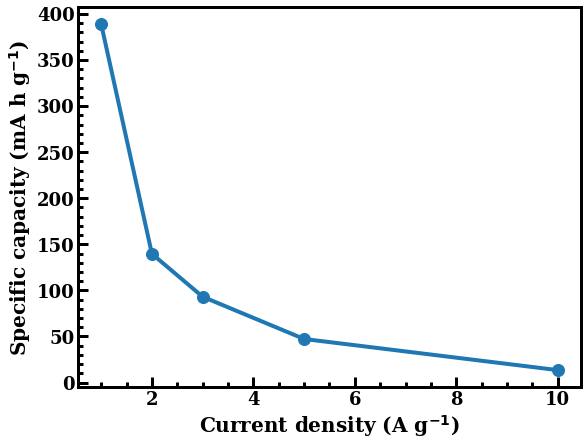

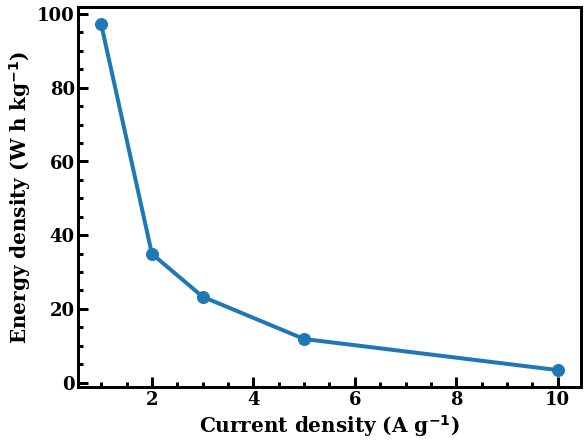

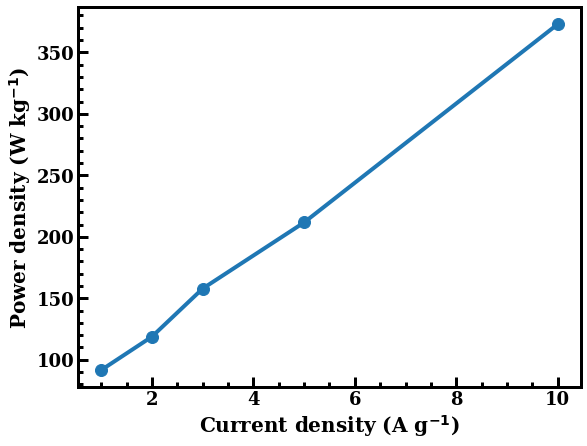

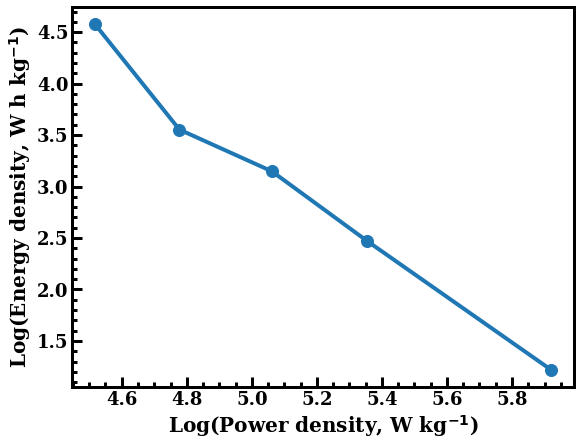

In [1]:
__author__ = "Baibhav Srivastava"
__copyright__ = "Copyright (C) 2022 Baibhav Srivastava"
__license__ = "Public Domain"
__version__ = "1.0"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

plt.rcParams['figure.figsize'] = (9,7)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.linewidth"] = 3
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
cmap = plt.get_cmap('tab10') 

def gcd():
    more_files = True
    data = []
    cur_den = []
    wt = []
    
    ticklabelsize = 18
    labelsize = 20
    tick_direction = 'in'
    tick_length = 10
    tick_width = 3    
    markersize = 12
    linewidth = 4
    
    mode = input("Choose between Current Density or Weight Percentage:\n")
    while more_files == True:
        name = input("Enter the name of the file: \n")
        dat = pd.read_csv(f'{str(name)}.txt', skiprows = 20, names = ['Time', 'V'], 
                          skipfooter = 12, engine = 'python', usecols = [0,1])
        data.append(dat)
        den = input("Enter the Current Density: \n")
        cur_den.append(float(den))
        if mode == "Weight Percentage":
            w = input("Enter the Weight %: \n")
            wt.append(float(w))
        more_files = input("Do you want to upload more files? \n")
        more_files = bool(int(more_files))
        
    out_name = input("Name of the Output File: \n")
    cur_den = np.array(cur_den)
    wt = np.array(wt)
    delv = float(input("Enter the Value of Potential Window:\n"))
    
    with open(f'{str(out_name)}.txt', 'w') as f:
        f.write("GCD ANALYSIS\n\n")
        if mode == 'Current Density':
            f.write(f"Current Densities Under Consideration: {cur_den}\n")
        elif mode == 'Weight Percentage':
            f.write(f"Weight Percentages Under Consideration: {wt}\n")
        f.write(f"Potential Window = {delv}\n")
        f.write("--"*60+"\n")
    
    fig = plt.figure()
    
    for i in range(len(data)):
        if ((mode == "Current Density") or (mode == "None")):
            plt.plot(data[i]['Time'], data[i]['V'], linewidth = linewidth, label = f"{int(cur_den[i])}A/g")
        elif mode == "Weight Percentage":
            plt.plot(data[i]['Time'], data[i]['V'], linewidth = linewidth, label = f"{wt[i]}%")
    plt.xlabel("Time (s)", fontweight = "bold", fontsize = labelsize)
    plt.ylabel("Potential (V)", fontweight = "bold", fontsize = labelsize)
    plt.legend(frameon = False, prop={'size': 20})
    plt.minorticks_on()
    plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
    plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
    plt.yticks(fontsize = ticklabelsize)
    plt.xticks(fontsize = ticklabelsize)
    plt.savefig("Charging Discharging for Different Current Densities.jpg", dpi = 600,bbox_inches = 'tight')
    plt.show()
    
    with open(f'{str(out_name)}.txt', 'a') as f:
        f.write("--"*60+"\n\n")
        f.write("\nCharging and Discharging Time\n\n")
        f.write("Current Density\tDischarge Time\tCharge Time\n")
    
    td, tc = [], []
    for i in range(len(data)):
        arr = data[i]
        t_d = arr['Time'].iloc[np.where(arr['V'] == max(arr['V']))[-1][-1]:
                            np.where(arr['V'] == min(arr['V']))[-1][-1]]
        t_c = arr['Time'].iloc[0:np.where(arr['V'] == max(arr['V']))[-1][-1]]
        
        deltd = t_d.iloc[-1] - t_d.iloc[0]
        deltc = t_c.iloc[-1] - t_c.iloc[0]
        
        td.append(deltd)
        tc.append(deltc)
        
        with open(f'{str(out_name)}.txt', 'a') as f:
            f.write(f"{cur_den[i]}\t{deltd}\t{deltc}\n")
        
    td = np.array(td)
    tc = np.array(tc)
    
    Vdt = []
    for arr in data:
        x = arr['Time'].iloc[np.where(arr['V'] == max(arr['V']))[-1][-1]:
                            np.where(arr['V'] == min(arr['V']))[-1][-1]]
        y = arr['V'].iloc[np.where(arr['V'] == max(arr['V']))[-1][-1]:
                            np.where(arr['V'] == min(arr['V']))[-1][-1]]
        area = np.trapz(y,x)
        Vdt.append(area)
    Vdt = np.array(Vdt)
    
    Sp_capacitance = []
    Sp_capacity = []
    E = []
    for i in range(len(cur_den)):
        Sp_capacitance.append(2*cur_den[i]*Vdt[i]/(delv**2))
        Sp_capacity.append(2*cur_den[i]*Vdt[i]/(3.6*delv))
        E.append(cur_den[i]*Vdt[i]/3.6)
    
    Sp_capacitance = np.array(Sp_capacitance)
    Sp_capacity = np.array(Sp_capacity) #mAhr/g
    E = np.array(E) #Whr/kg

    P = E/td*3600 #W/kg
    
    with open(f'{str(out_name)}.txt', 'a') as f:
        f.write("\n\n"+"--"*60+"\n\n")
        f.write("\nMaterial Properties\n\n")
        if ((mode == 'Current Density') or (mode == 'None')):
            f.write("Current Density\tSpecific Capacitance\tSpecific Capacity\tEnergy Density\tPower\n")
        elif mode == 'Weight Percentage':
            f.write("Weight %\tSpecific Capacitance\tSpecific Capacity\tEnergy Density\tPower\n")
        for i in range(0, len(cur_den)):
            if ((mode == 'Current Density') or (mode == 'None')):
                f.write(f"{cur_den[i]}\t{Sp_capacitance[i]}\t{Sp_capacity[i]}\t{E[i]}\t{P[i]}\n")
            elif mode == 'Weight Percentage':
                f.write(f"{wt[i]}\t{Sp_capacitance[i]}\t{Sp_capacity[i]}\t{E[i]}\t{P[i]}\n")
    
    if mode == "Current Density":
        
        plt.plot(cur_den, Sp_capacitance, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel(r"Current density (A g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Specific capacitance (F g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Specific Capacitance", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
        plt.plot(cur_den, Sp_capacity, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Current density (A g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Specific capacity (mA h g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Specific Capacity.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
        plt.plot(cur_den, E, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Current density (A g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Energy density (W h kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Energy Density.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
        plt.plot(cur_den, P, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Current density (A g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Power density (W kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Power Density.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
        plt.plot(np.log(P),np.log(E), marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel(r"Log(Power density, W kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Log(Energy density, W h kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Ragone Plot.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
    elif mode == "Weight Percentage":
    
        plt.plot(wt, Sp_capacitance, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Weight %", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Specific capacitance (F g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Specific Capacitance.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
    
        plt.plot(wt, Sp_capacity, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Weight %", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Specific capacity (mA h g$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Specific Capacity.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
        plt.plot(wt, E, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Weight %", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Energy density (W h kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Energy Density.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
    
        plt.plot(wt, P, marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel("Weight %", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Power density (W kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Power Density.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
        
        plt.plot(np.log(P),np.log(E), marker = 'o', markersize = markersize, linewidth = linewidth)
        plt.xlabel(r"Log(Power density, W kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.ylabel("Log(Energy density, W h kg$^{-1}$)", fontweight = "bold", fontsize = labelsize)
        plt.minorticks_on()
        plt.tick_params(which = 'major', direction = tick_direction, width = tick_width, length = tick_length)
        plt.tick_params(which = 'minor', direction = tick_direction, width = tick_width, length = tick_length/2)
        plt.yticks(fontsize = ticklabelsize)
        plt.xticks(fontsize = ticklabelsize)
        plt.savefig("Ragone Plot.jpg", dpi = 600,bbox_inches = 'tight')
        plt.show()
    
    elif mode == "None":
        for i in range(len(data)):
            print(f"Specific Capacity = {Sp_capacity[i]}" + r" mA h/g$")
            print(f"Specific Capacitance = {Sp_capacitance[i]}" + r" F/g")
            print(f"Energy Density = {E[i]}" + r" W h/kg$")
            print(f"Power Density = {P[i]}" + r" W/kg")
gcd()